# Proyecto Final Propedéutico: Análisis de datos de ECOBICI

### Equipo 6:

- Darío Díaz Cuevas
- Eduardo Moreno Ortíz
- Elena Villalobos Nolasco

### Introducción

El presente proyecto final tuvo como objetivo analizar bases de datos proporcionadas por el sistema de bicicletas públicas de la Ciudad de México, ECOBICI. El trabajo escrito se divide en tres capítulos que describen los objetivos presentados a continación. 

### Objetivos 

**1. Análisis descriptivo:**

Realizar un análisis descriptivo las bases de datos de mayo 2019 y mayo 2020. Se eligieron dichos meses debido a que se quería contrastar si existe alguna diferencia en el uso de dicho sistema debido a la actual contingencia sanitaria por el COVID-19. 

**2. Analisis de Rutas y tiempo de viajes:**

Realizar un análisis de las rutas y de los tiempos de viaje de las bases de mayo 2019 y mayo 2020.

**3. Análisis de series de tiempo con cantidad de viajes:**

Realizar un análisis de serie de tiempo de la cantidad de viajes realizados, con modelos ARIMA. Este análisis se realizó tomando en cuenta los datos desde febrero 2010 hasta mayo 2020.

### Características generales del sistema ECOBICI

Es un método de transporte público para recorrer distancias cortas y medianas. ECOBICI cuenta con 480 cicloestaciones en 55 colonias de la ciudad, así como 6,800 bicicletas. Este sistema comenzó desde febrero de 2010 y ha crecido a lo largo de los años. 

### Información de uso

Se utiliza una tarjeta para poder tomar bicicletas de cualquier cicloestación y después depositarla en el lugar más cercano a tu destino. Se utiliza en trayectos ilimitados de 45 minutos cada uno durante el periodo contratado. El horario de servicio es de 05:00 a 00:30 horas de lunes a domingo. 

## 1. Análisis descriptivo

### Características de la base de datos:

Para este primer capítulo se analizaron los meses de mayo 2019 y mayo 2020. Ambas bases, después de una limpieza y observación detallada de variables y varoles atípicos, contienen 9 variables:

1. Genero_Usuario: M (Masculino), F (Femenino).
2. Edad_Usuario: Edad del usuario que realiza el viaje.
3. Bici: Identificación de la bicicleta utilizada.
4. Ciclo_Estacion_Retiro: Identificación de la cicloestación de donde se retiró la bicicleta. 
5. Fecha_Retiro: Día, mes y año de la fecha de retiro
6. Hora_Retiro: Hora de retiro de la bicicleta
7. Ciclo_Estacion_Arribo: Identificación de la cicloestación en la arribó la bicicleta. 
8. Fecha_Arribo: Día, mes y año de la fecha de retiro
9. Hora_Arribo: Hora de arribo de la bicicleta.

- La base de Mayo 2019 tiene: 750,910 observaciones. 

- La base de Mayo 2020 tiene: 153,147 observaciones.

In [1]:
# Clear workspace
rm(list=ls())

In [3]:
# Packages
library(tidyverse)
options(repr.plot.width=10,repr.plot.height=10)

In [4]:
# Setting working directory
setwd("~/Documents/Prope20MCD/Practicas_equipos/practica-final-por-equipos-verano-2020-itam-Eduardo-Moreno")

In [5]:
# Data
may_20 <- read.csv('Mayo20.csv')
may_19 <- read.csv('Mayo19.csv')

In [6]:
# Observamos datos
glimpse(may_19)

Rows: 750,910
Columns: 9
$ Genero_Usuario        <fct> M, M, M, F, M, M, M, M, M, M, M, M, M, M, F, M,…
$ Edad_Usuario          <int> 25, 26, 28, 23, 33, 32, 34, 31, 34, 30, 28, 44,…
$ Bici                  <int> 1427, 8431, 10212, 12098, 11352, 8502, 9239, 93…
$ Ciclo_Estacion_Retiro <int> 372, 202, 340, 290, 290, 64, 374, 390, 64, 207,…
$ Fecha_Retiro          <fct> 01/05/2019, 01/05/2019, 01/05/2019, 01/05/2019,…
$ Hora_Retiro           <fct> 00:00:04, 00:00:26, 00:00:49, 00:00:51, 00:01:0…
$ Ciclo_Estacion_Arribo <int> 397, 318, 394, 292, 292, 68, 332, 173, 67, 129,…
$ Fecha_Arribo          <fct> 01/05/2019, 01/05/2019, 01/05/2019, 01/05/2019,…
$ Hora_Arribo           <fct> 00:05:18, 00:32:24, 00:11:31, 00:05:30, 00:05:3…


In [7]:
glimpse(may_20)

Rows: 153,147
Columns: 9
$ Genero_Usuario        <fct> M, M, M, M, M, M, M, M, M, M, M, M, M, M, M, M,…
$ Edad_Usuario          <int> 44, 33, 30, 29, 46, 39, 34, 27, 19, 30, 20, 35,…
$ Bici                  <fct> 2570, 7849, 8624, 8659, 10275, 11089, 11563, 41…
$ Ciclo_Estacion_Retiro <int> 24, 4, 12, 171, 287, 156, 234, 143, 167, 295, 1…
$ Fecha_Retiro          <fct> 01/05/2020, 01/05/2020, 01/05/2020, 01/05/2020,…
$ Hora_retiro           <fct> 00:00, 00:01, 00:06, 00:07, 00:08, 00:09, 00:09…
$ Ciclo_Estacion_Arribo <int> 183, 4, 1, 330, 288, 80, 270, 70, 166, 136, 43,…
$ Fecha_Arribo          <fct> 01/05/2020, 01/05/2020, 01/05/2020, 01/05/2020,…
$ Hora_Arribo           <fct> 00:08, 00:05, 00:10, 00:13, 00:11, 00:12, 00:34…


Se puede observar que de manera general ambas bases difieren demasiado en la cantidad de observaciones. 

#### Variable de Genero

Primero observamos estadísticas generales del género con respecto a la edad.

In [8]:
may_19 %>% 
  group_by(Genero_Usuario) %>% 
  summarize(media=mean(Edad_Usuario),
            mediana=median(Edad_Usuario),
            min=min(Edad_Usuario),
            max=max(Edad_Usuario))

`summarise()` ungrouping output (override with `.groups` argument)



Genero_Usuario,media,mediana,min,max
<fct>,<dbl>,<int>,<int>,<int>
F,33.27527,31,16,78
M,35.79666,33,16,96


In [9]:
may_20 %>% 
  group_by(Genero_Usuario) %>% 
  summarize(media=mean(Edad_Usuario),
            mediana=median(Edad_Usuario),
            min=min(Edad_Usuario),
            max=max(Edad_Usuario))

`summarise()` ungrouping output (override with `.groups` argument)



Genero_Usuario,media,mediana,min,max
<fct>,<dbl>,<dbl>,<int>,<int>
F,34.74104,32,17,87
M,37.44754,35,16,79


En ambos grupos se observa de manera general que la media de edad con respecto al género es mayor en hombres que en mujeres en ambos grupos. A contuación se presenta un gráfico de barras de los conteos absolutos, después de los conteos proporcionales.

In [10]:
gen <- c(table(may_19$Genero_Usuario),table(may_20$Genero_Usuario))

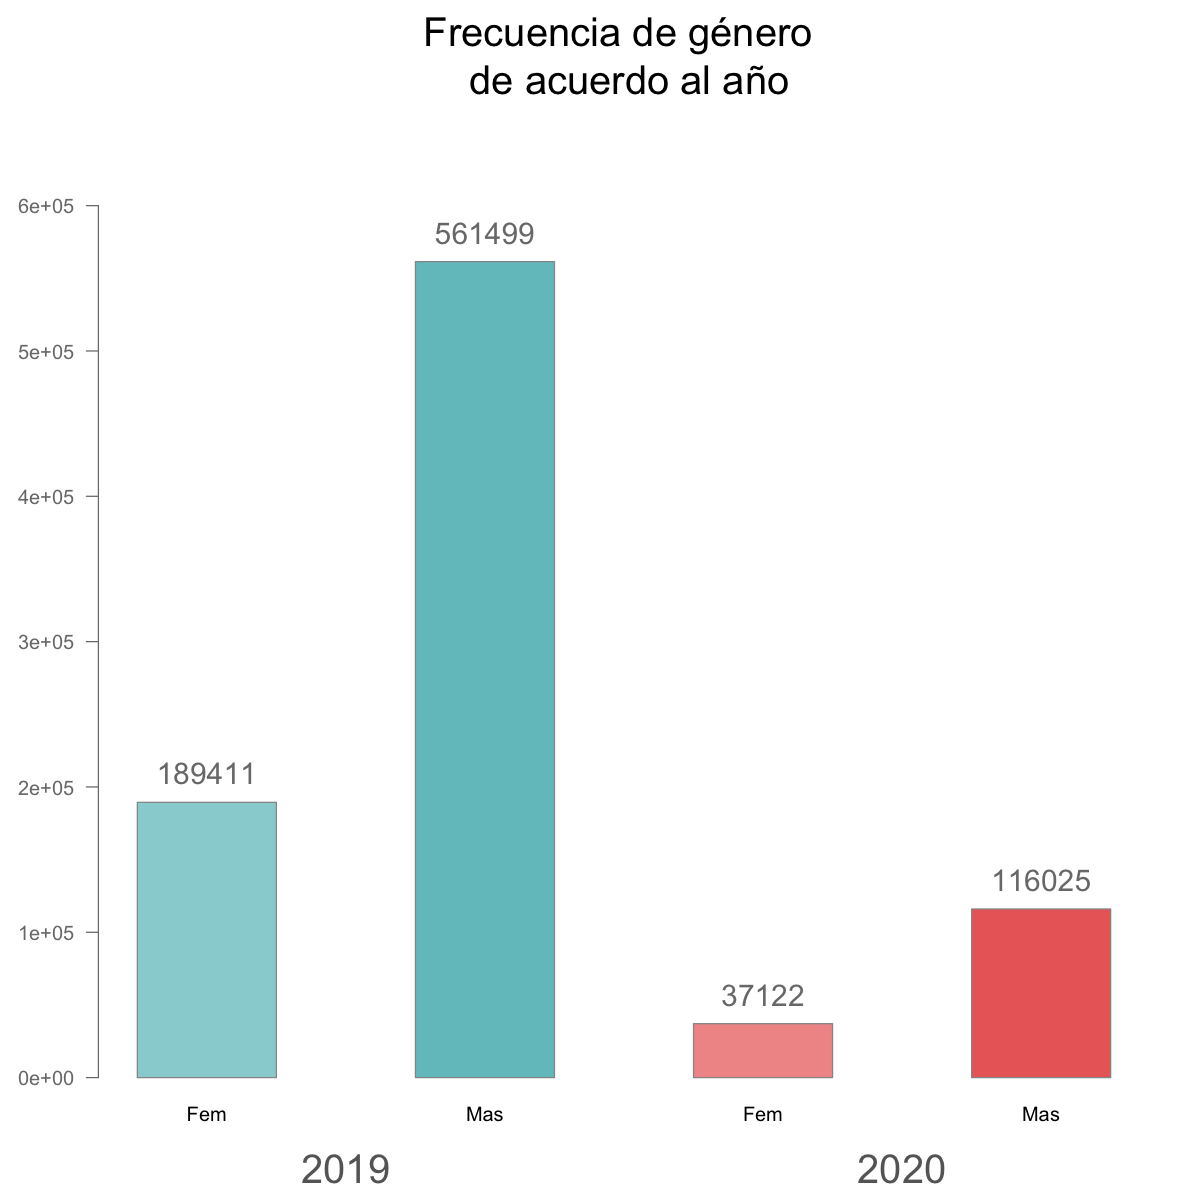

In [38]:
# Definimos algunos colores
rosa <- '#E95D59EE'
azul <- '#45B4B8CC'
gris <- '#969696FF'

# Graficamos
barplot(gen,axes=F,space = 1,ylim=c(0,gen[2]*1.2),
        col=c('#45B4B899',azul,'#E95D59AA',rosa), border=gris,
        names.arg=c('Fem','Mas','Fem','Mas'))
axis(2,las=2,col='gray48',col.axis='gray48')
text(1.5,gen[1]+20000,paste(gen[1]),cex=1.5,col='gray48')
text(3.5,gen[2]+20000,paste(gen[2]),cex=1.5,col='gray48')
text(5.5,gen[3]+20000,paste(gen[3]),cex=1.5,col='gray48')
text(7.5,gen[4]+20000,paste(gen[4]),cex=1.5,col='gray48')
mtext('Frecuencia de género \n de acuerdo al año',3, cex=2)
mtext('2019',1,at=2.5,padj = 3,cex=2,col='gray40')
mtext('2020',1,at=6.5,padj = 3,cex=2,col='gray40')

En este gráfico se observa que en general existe un uso mayor de los hombres tanto en el año 2019 como en el año 2020. Y también se observa que disminuyó de manera significativa los conteos de usuarios mujeres y hombres en el mes de mayo 2020.

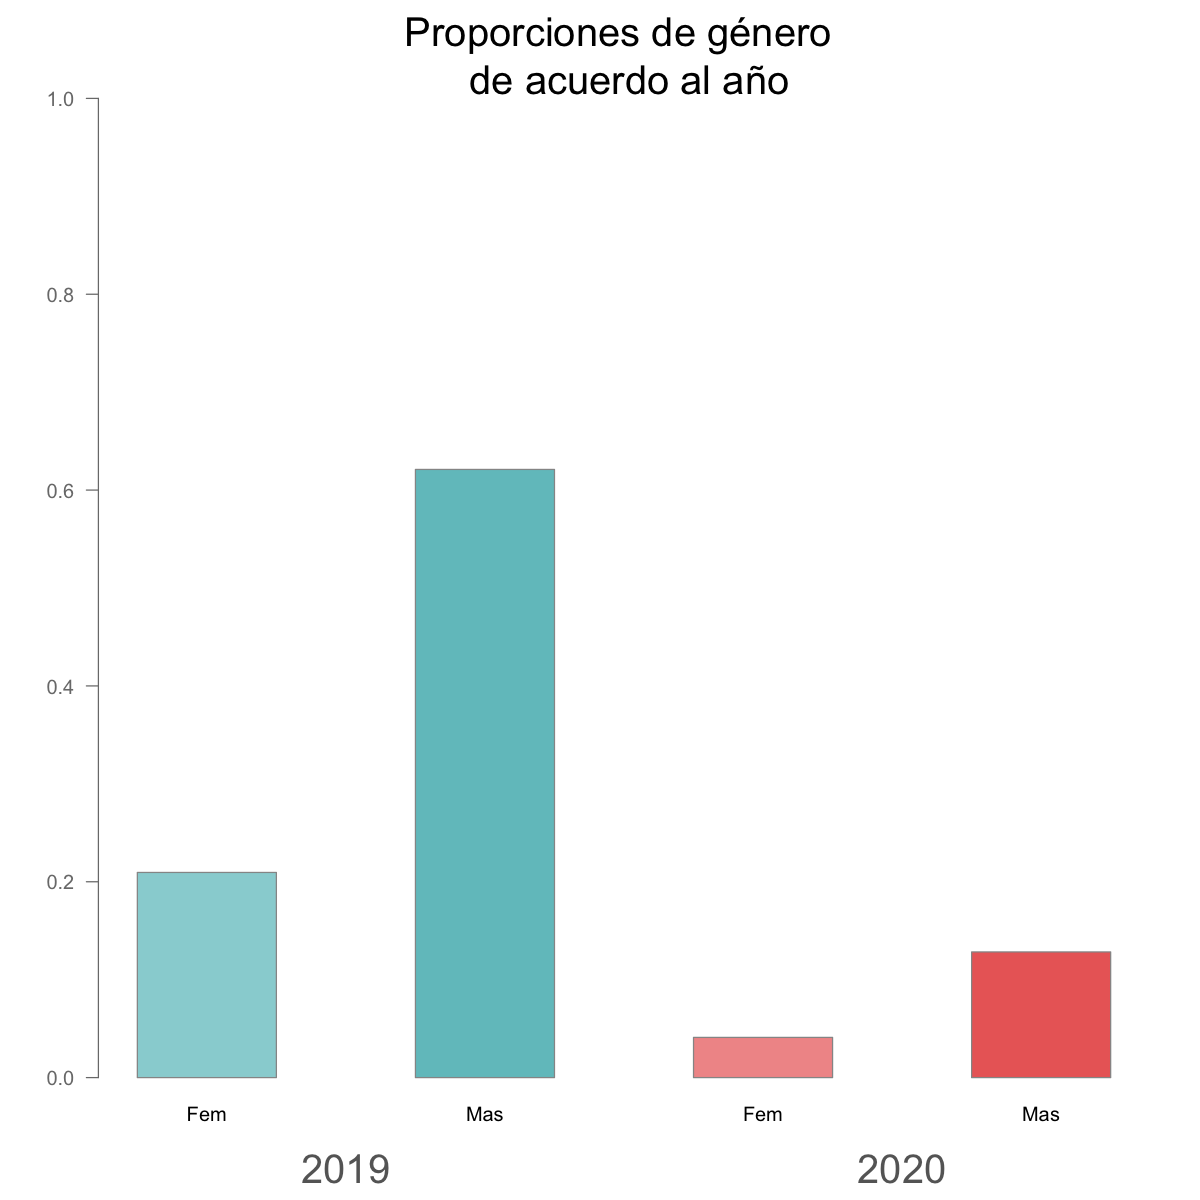

In [12]:
barplot(prop.table(gen),axes=F,space = 1,ylim=c(0,1),
        col=c('#45B4B899',azul,'#E95D59AA',rosa), border=gris,
        names.arg=c('Fem','Mas','Fem','Mas'))
axis(2,las=2,col='gray48',col.axis='gray48')
text(1.5,gen[1]+20000,paste(gen[1]),cex=1.5,col='gray48')
text(3.5,gen[2]+20000,paste(gen[2]),cex=1.5,col='gray48')
text(5.5,gen[3]+20000,paste(gen[3]),cex=1.5,col='gray48')
text(7.5,gen[4]+20000,paste(gen[4]),cex=1.5,col='gray48')
mtext('Proporciones de género \n de acuerdo al año',3, cex=2)
mtext('2019',1,at=2.5,padj = 3,cex=2,col='gray40')
mtext('2020',1,at=6.5,padj = 3,cex=2,col='gray40')

Este gráfico coloca las proporciones de usuarios del género femenino y masculino de ambas bases de datos. Aquí se confirma de nuevo que hubo una mayor proporción de usuarios hombres que utilizaron la bici en mayo 2019 y la disminución de uso en el 2020.

### Variable de edad del usuario.

A continuación se presenta un histograma de las edades de los usuarios que coloca en el mismo plano la información de las bases de mayo 2019 y 2020. Se observa que ambas son muy similares entre sí con respecto a la forma de su distribución, sin embargo, existe una disminución de alrededor de 3/4 en la frecuencia de la edad de los usuarios en el mes de mayo 2020. 

In [13]:
edad_19 <- may_19$Edad_Usuario
edad_20 <- may_20$Edad_Usuario

In [14]:
summary(edad_19)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  16.00   28.00   32.00   35.16   40.00   96.00 

In [15]:
summary(edad_20)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  16.00   29.00   34.00   36.79   43.00   87.00 

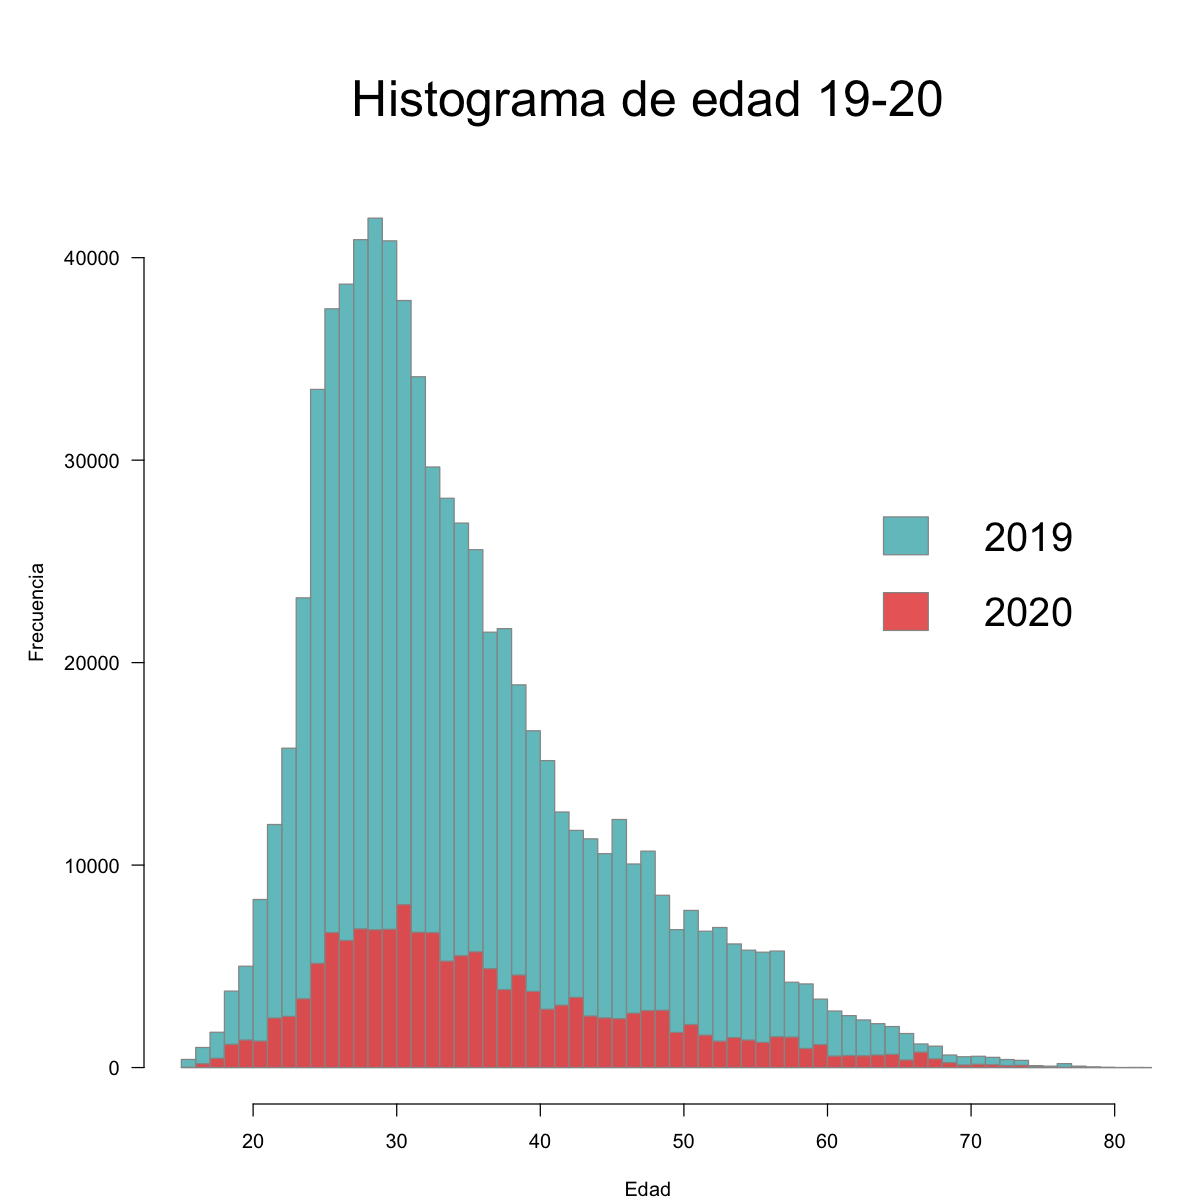

In [16]:
par(mar=c(4,6,5,2))
hist(edad_19,
     xlim=c(15,80),ylim=c(0,45000),axes=F,
     xlab='Edad',ylab='',main='',
     breaks=seq(15,100,1),
     col=azul,
     border=gris)
axis(1)
axis(2,las=2)
hist(edad_20,add=T,
     breaks=seq(15,100,1),
     col=rosa,
     border=gris)
mtext('Histograma de edad 19-20', 3, cex=2.5)
mtext('Frecuencia', 2, line=4)
legend(60,30000,legend = c(2019,2020),
       fill = c(azul,rosa),border=c(gris,gris),
       box.col='white',cex=2)

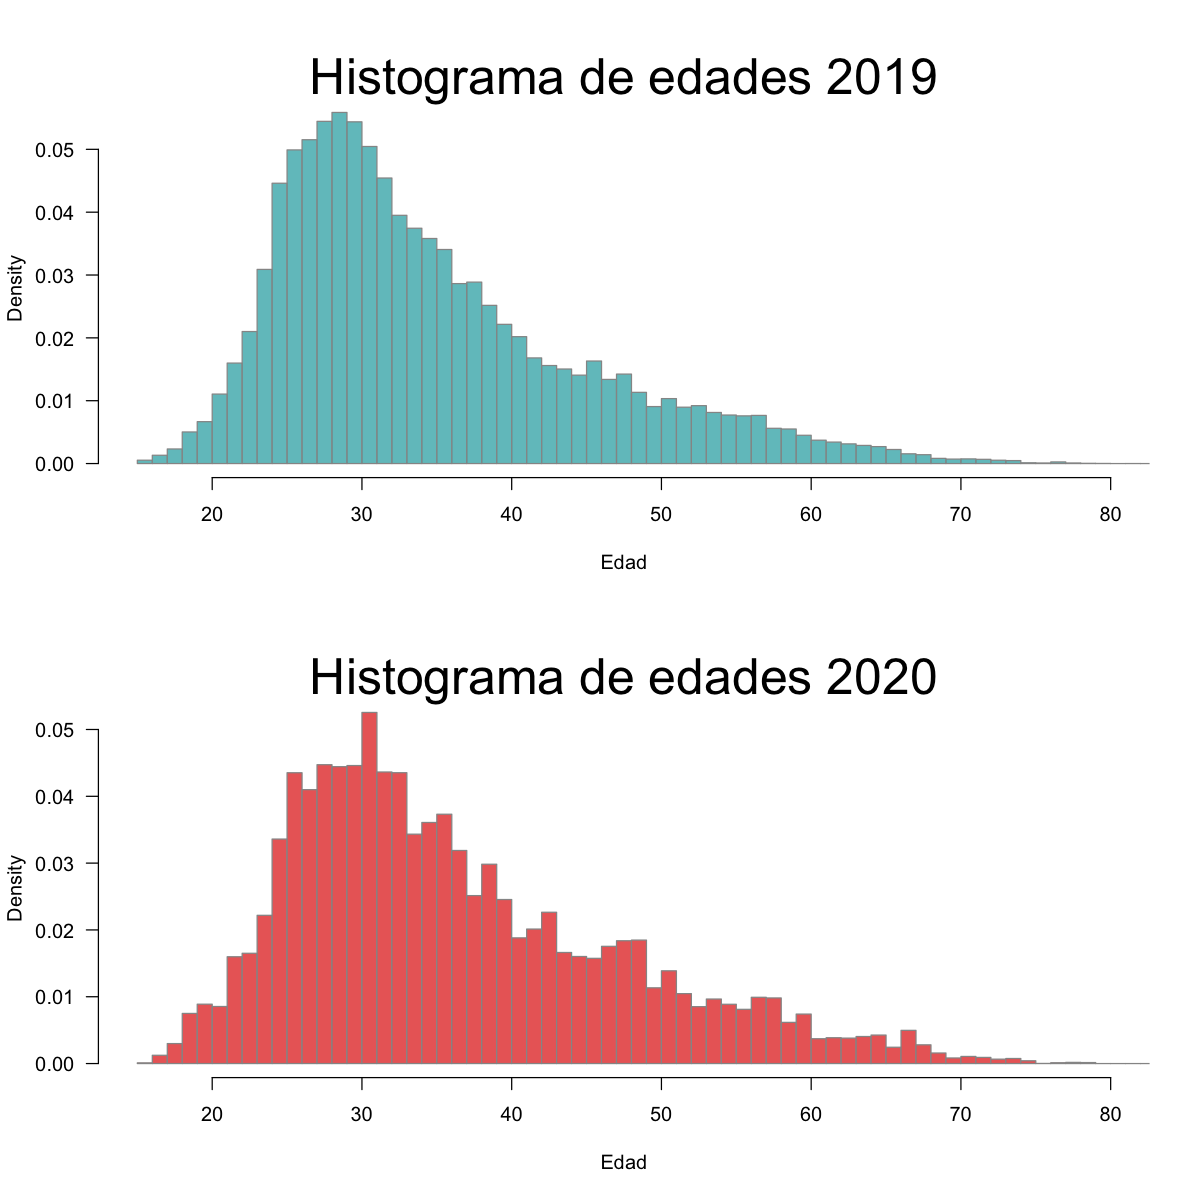

In [17]:
layout(1:2)

hist(edad_19,
     xlim=c(15,80),axes=F,
     xlab='Edad',main='',
     breaks=seq(15,100,1),
     col=azul,
     border=gris,freq=F)
axis(1)
axis(2,las=2)
mtext('Histograma de edades 2019', 3, cex=2.5)

hist(edad_20,xlim=c(15,80),
     breaks=seq(15,100,1),
     col=rosa,xlab='Edad',
     border=gris,main='',axes=F,freq=F)
mtext('Histograma de edades 2020', 3, cex=2.5)

axis(1)
axis(2,las=2)

Las última figura contiene unos los histogramas con las proporciones de la edades de ambos grupos. Se confirma que ambas distribuciones están concentradas en edades del rango 25 a 40 año. También se observa que ambas distribuciones están sesgadas a la izquierda, es decir, más usuarios jóvenes utilizaron ecobici. Sin embargo, la base de 2020 tiene un pico mucho más pronunciado en la edad de 30 y las edades alrededor de ésta, son más similares entre sí; mientras que las frecuencias en las edades de los usuarios de la base del 2019 tiene una disminución más suave con respecto a la edad más frecuente.

### Variable de cicloestaciones de retiro y arribo.

Recordemos que existen 480 estaciones, por lo que cualquier valor fuera de este rango se puede deber a errores de registro, por lo tanto filtramos los datos:

In [18]:
estaciones_20 <- may_20 %>% 
  filter(Ciclo_Estacion_Retiro <= 480) %>% 
  filter(Ciclo_Estacion_Arribo <= 480) %>% 
  select(Ciclo_Estacion_Retiro,Ciclo_Estacion_Arribo)

estaciones_19 <- may_19 %>% 
  filter(Ciclo_Estacion_Retiro <= 480) %>% 
  filter(Ciclo_Estacion_Arribo <= 480) %>% 
  select(Ciclo_Estacion_Retiro,Ciclo_Estacion_Arribo)

A continuación se presenta un histograma que coloca en un sólo gráfico las cicloestaciones más utilizadas, tanto para el retiro y arribo de las bases de mayo 2019 y mayo 2020. De manera general se observa que existen cicloestaciones que las cicloestaciones del 1 al 80 son las más utilizadas que de acuerdo al [mapa](https://www.ecobici.cdmx.gob.mx/sites/default/files/pdf/wp_2020_2_web_mapa_3.pdf), son las cicloestaciones localizadas en la colonia Condesa, Roma, Escandon, entre otras. También se observa que las cicloestaciones que tienen identificadores arriba de 200, disminuye su uso, que son las colonias menos céntricas. Esto con excepción de las cicloestaciones cercanas al 280, que parecen tener un mayor uso, incluso mayor que las primeras cicloestaciones. 

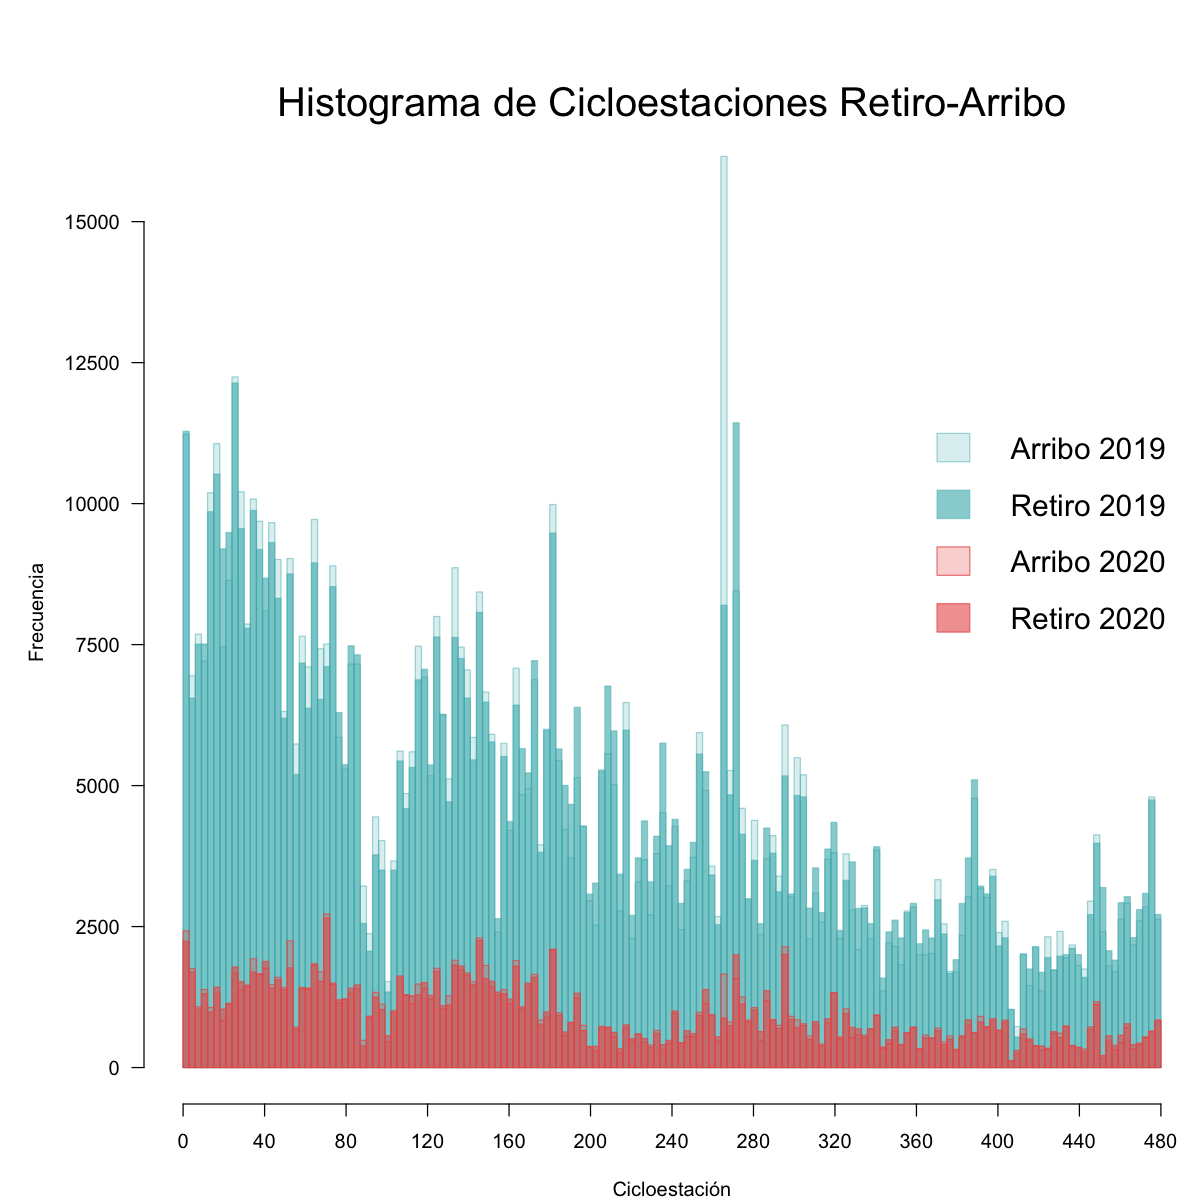

In [19]:
par(mar=c(4,6,5,0))
hist(estaciones_19[,2],col='#45B4B833',border='#45B4B877',
     breaks=seq(0,480,3),axes=F,xlab='Cicloestación',ylab='',main='')
axis(1,at=seq(0,480,40))
axis(2,las=2,at=seq(0,15000,2500))
mtext('Frecuencia', 2, line=4)
mtext('Histograma de Cicloestaciones Retiro-Arribo',3,cex=2)
hist(estaciones_19[,1],col='#45B4B899',border='#45B4B877',add=T,breaks=seq(0,480,3))
hist(estaciones_20[,2],add=T,col='#E95D5944',border='#E95D59BB',breaks=seq(0,480,3))
hist(estaciones_20[,1],add=T,col='#E95D5999',border='#E95D59BB',breaks=seq(0,480,3))
legend(350,12000,legend = c('Arribo 2019','Retiro 2019','Arribo 2020','Retiro 2020'),
       fill  = c('#45B4B833','#45B4B899','#E95D5944','#E95D5999'),
       border= c('#45B4B877','#45B4B877','#E95D59BB','#E95D59BB'),
       box.col='white',cex=1.5)

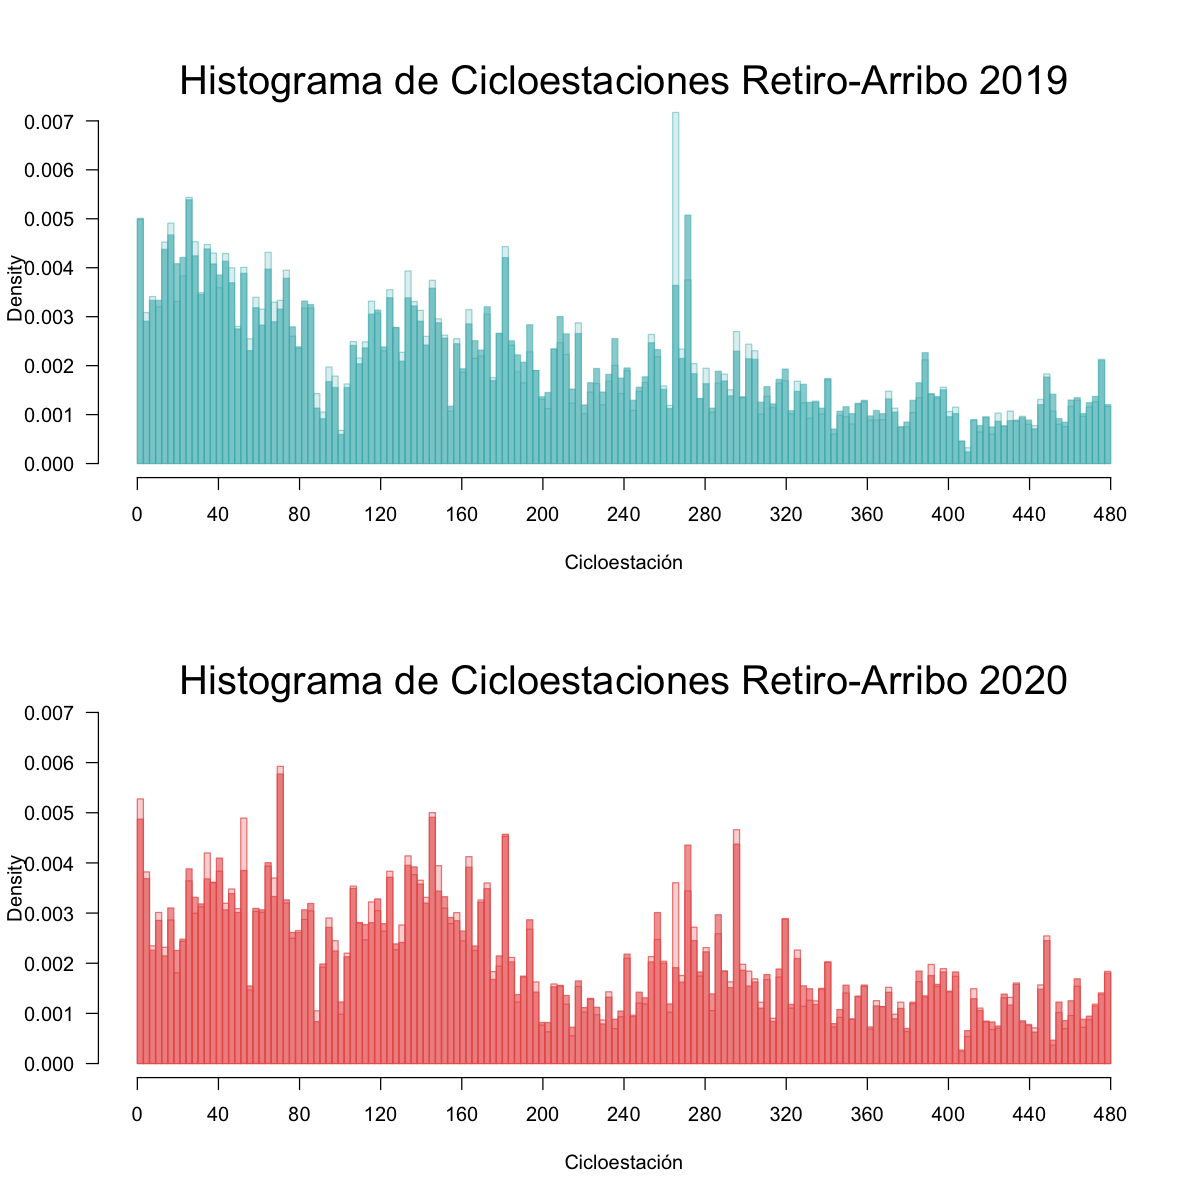

In [20]:
layout(1:2)
hist(estaciones_19[,2],col='#45B4B833',border='#45B4B877',
     breaks=seq(0,480,3),axes=F,xlab='Cicloestación',main='',freq=F)
axis(1,at=seq(0,480,40))
axis(2,las=2)
mtext('Histograma de Cicloestaciones Retiro-Arribo 2019',3,cex=2)
hist(estaciones_19[,1],col='#45B4B899',border='#45B4B877',add=T,breaks=seq(0,480,3),freq=F)

hist(estaciones_20[,2],xlim=c(0,480),freq=F,main='',xlab='Cicloestación',
     col='#E95D5944',border='#E95D59BB',breaks=seq(0,480,3),axes=F,ylim=c(0,0.007))
hist(estaciones_20[,1],add=T,freq=F,
     col='#E95D5999',border='#E95D59BB',breaks=seq(0,480,3))
mtext('Histograma de Cicloestaciones Retiro-Arribo 2020',3,cex=2)
axis(1,at=seq(0,480,40))
axis(2,las=2)

El último gráfico son unos histogramas que toman en cuenta la proporción de los retiros y arribos de ambas bases. De manera más puntual se observa que la base del 2020 tiene una distribución un poco más uniforme con respecto al uso de cicloestaciones. Mientras que en la base del 2019 se observan grupos de cicloestaciones más utilizadas. 

### Variable de fechas de retiro y arribo

Para poder graficar más fácilmente las fechas se convirtió la fecha en variables numéricas y que separan en números el día, el mes y el año.

In [21]:
# Separamos las variables Fecha_Retiro y Fecha Arribo
may_19_2 <- separate(may_19,Fecha_Retiro,
                   c('Dia_Re','Mes_Re','Anio_Re'))
may_19_2 <- separate(may_19_2,Fecha_Arribo,
                   c('Dia_Ar','Mes_Ar','Anio_Ar'))

# Las hacemos numéricas
may_19_2[,c(5,6,7,10,11,12)] <- sapply(may_19_2[,c(5,6,7,10,11,12)],as.numeric)

# Filtramos que sean sólo de mayo
may_19_2 <- may_19_2 %>% 
  filter(Mes_Re == 5)

In [22]:
# Separamos las variables Fecha_Retiro y Fecha Arribo
may_20_2 <- separate(may_20,Fecha_Retiro,
                   c('Dia_Re','Mes_Re','Anio_Re'))
may_20_2 <- separate(may_20_2,Fecha_Arribo,
                   c('Dia_Ar','Mes_Ar','Anio_Ar'))

# Las hacemos numéricas
may_20_2[,c(5,6,7,10,11,12)] <- sapply(may_20_2[,c(5,6,7,10,11,12)],as.numeric)

# Filtramos que sean sólo de mayo
may_20_2 <- may_20_2 %>% 
  filter(Mes_Re == 5)

A continuación se muestran la frecuencia de los días de retiro de una bicicleta en el mes de mayo del 2019. Esta información coincide con la del arribo por lo que sólo se presentará la información del día del retiro de la bicicleta. 

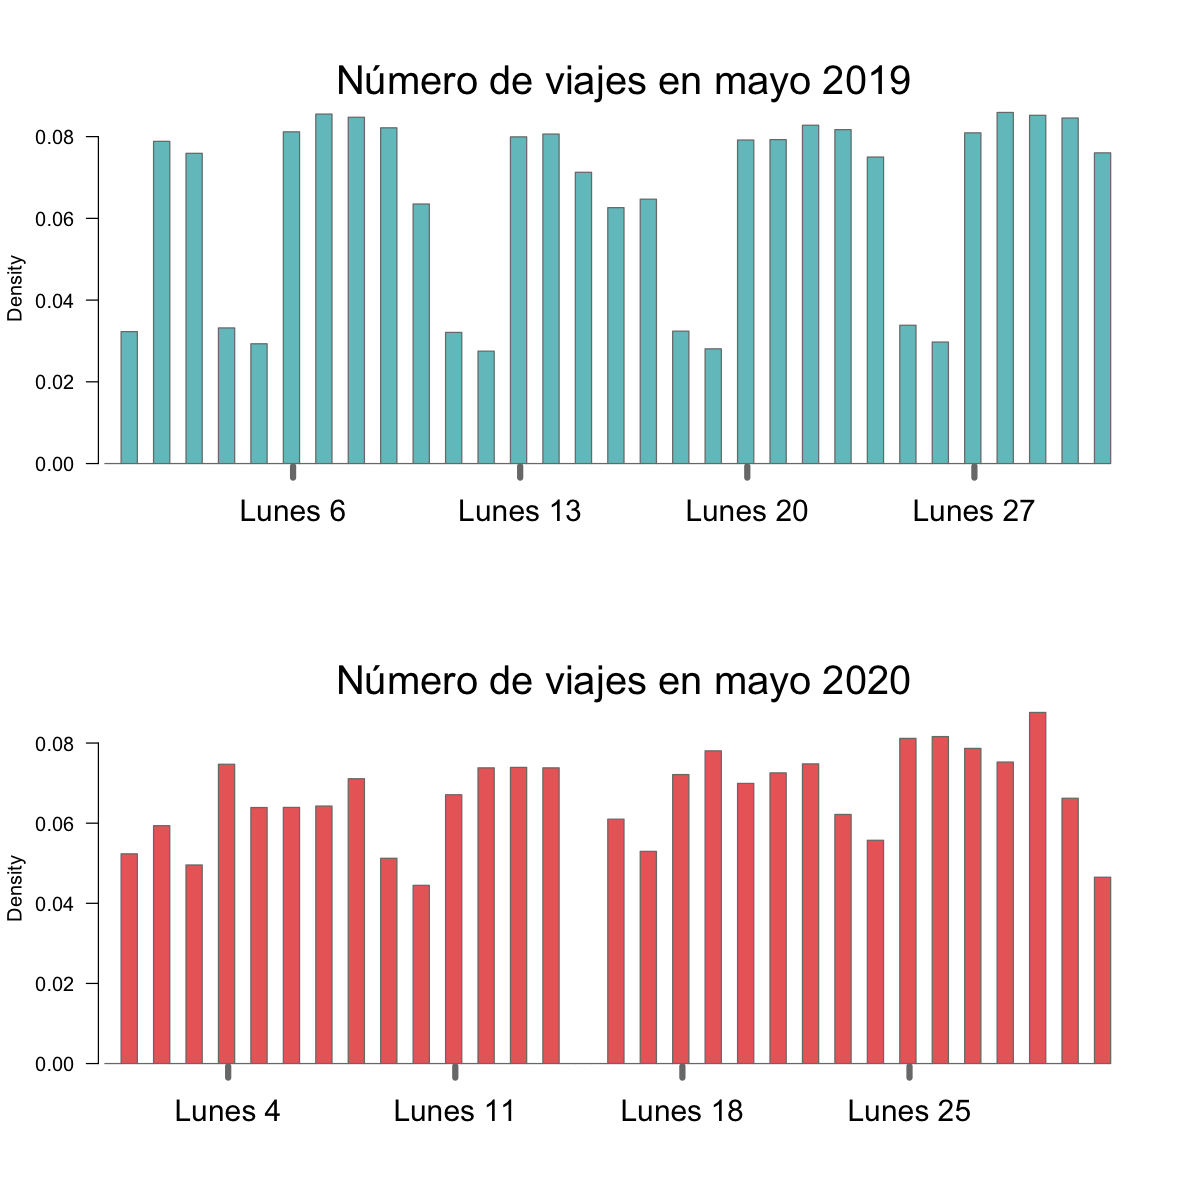

In [34]:
dias_sem <- c('M','V', rep(c('L','M',''),4))
layout(1:2)
hist(may_19_2$Dia_Re,col=azul,border='gray48',breaks=seq(0,31,0.5),freq=F,
     axes=F,xlab='',main='',xlim=c(1,31))
axis(1,at=seq(5.8,31,7),col='white',col.ticks='gray48',cex.axis=1.5,
     labels=c('Lunes 6', 'Lunes 13','Lunes 20','Lunes 27'),lwd.tick=5,tck=0.03)
axis(2,las=2)
mtext('Número de viajes en mayo 2019',cex=2)

hist(may_20_2$Dia_Re,col=rosa,border='gray48',breaks=seq(0,31,0.5),
     axes=F,xlab='',main='',xlim=c(1,31),freq=F)
axis(1,at=seq(3.8,31,7),col='white',col.ticks='gray48',cex.axis=1.5,
     labels=c('Lunes 4', 'Lunes 11','Lunes 18','Lunes 25'),lwd.tick=5,tck=0.03)
axis(2,las=2)
mtext('Número de viajes en mayo 2020',cex=2)

En el gráfico del número de viajes en mayo 2019 se observan ciclos donde el uso de la ECOBICI se incrementa en los días hábiles de la semana, y los fines de semana disminuye a casi la mitad de viajes. Esto contrasta con el número de viajes en mayo 2020 pues se observa una distribución más uniforme en los números de viaje independiente del día de la semana. Esto sugiere que el este sistema de ECOBICI se utiliza para asistir al trabajo o a la escuela, pues debido a la pandemia la gente dejó de asistir a dichas actividades cotidianas y se observa en un uso más uniforme a través de los días de la semana.

A continuación se presentará el siguiente capítulo que realizará un análisis más detallado sobre las rutas y los tiempos de viajes de las bases de mayo 2019 y mayo 2020.